<a href="https://colab.research.google.com/github/tejasvipv/Data-Science-projects/blob/main/NLP/Amazon_Product_Reviews_Sentiment_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

Error reading CSV file: Error tokenizing data. C error: EOF inside string starting at row 23722


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
try:
    data = pd.read_csv("Reviews.csv")
    print(data.head())
except pd.errors.ParserError as e:
    print(f"Error reading CSV file: {e}")
    # Print the lines around the problematic row
    with open("Reviews.csv", 'r') as f:
        lines = f.readlines()
        for i in range(104320, 104330): # Print lines around row 104325
            if i < len(lines):
                print(f"Line {i+1}: {lines[i]}")

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score          Time  \
0                   1.0                     1.0    5.0  1.303862e+09   
1                   0.0                     0.0    1.0  1.346976e+09   
2                   1.0                     1.0    4.0  1.219018e+09   
3                   3.0                     3.0    2.0  1.307923e+09   
4                   0.0                     0.0    5.0  1.350778e+09   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality cann

In [ ]:
data.shape

(29941, 10)

In [ ]:
data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,416275.000000,416274.000000,416274.000000,416274.000000,4.162740e+05
mean,208138.000000,1.758371,2.245934,4.176446,1.296018e+09
std,120168.385991,7.875013,8.527677,1.314967,4.795784e+07
min,1.000000,0.000000,0.000000,1.000000,9.393408e+08
25%,104069.500000,0.000000,0.000000,4.000000,1.270685e+09
50%,208138.000000,0.000000,1.000000,5.000000,1.310774e+09
75%,312206.500000,2.000000,2.000000,5.000000,1.332461e+09
max,416275.000000,866.000000,923.000000,5.000000,1.351210e+09


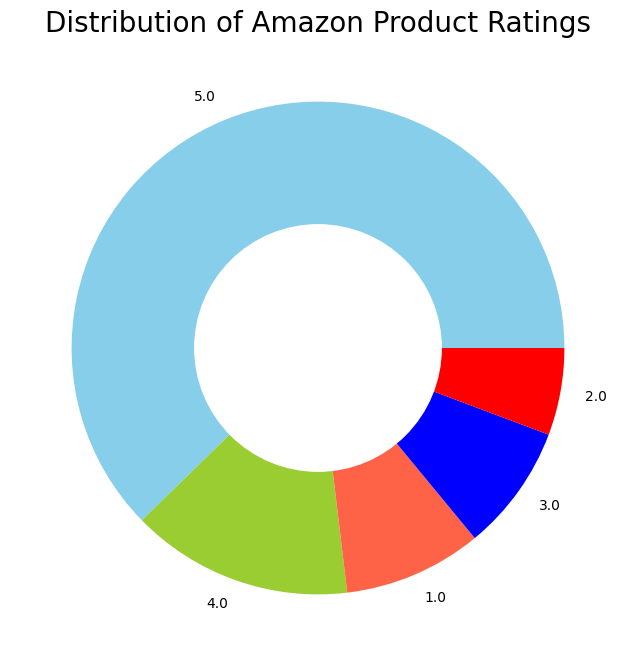

In [ ]:
ratings = data["Score"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Amazon Product Ratings", fontsize=20)
plt.show()

In [ ]:
data["Text"] = data["Text"].astype(str)
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Text"]]
print(data.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score          Time  \
0                   1.0                     1.0    5.0  1.303862e+09   
1                   0.0                     0.0    1.0  1.346976e+09   
2                   1.0                     1.0    4.0  1.219018e+09   
3                   3.0                     3.0    2.0  1.307923e+09   
4                   0.0                     0.0    5.0  1.350778e+09   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality can

In [ ]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [ ]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  5727.301999999992
Negative:  1274.9399999999825
Neutral:  22938.71099999995
